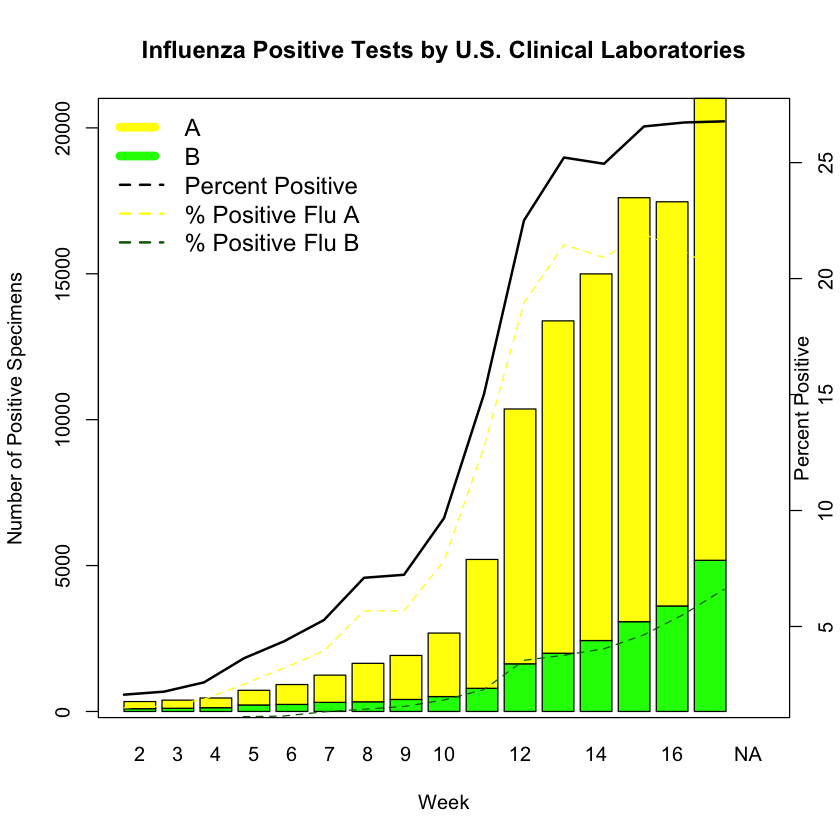

In [116]:
#TEAM MEMBER1: NIMISHA PHILIP RODRIGUES
#TEAM MEMBER2: MANASI SAMIR TAMBOLI
library("ggplot2")
library("ggmap")
library("sp")
library("maptools")
library("maps")
library("reshape")

d <- read.csv("Influenza_Positive_Tests.csv")[2:18,]
temp <- d[,c(3,2)]
xlength <- 1:length(d[,1])
barplot(t(temp),col=c("green","yellow"))
par(new=TRUE)
plot(xlength, d[,7], xlab = "Week", ylab = "Number of Positive Specimens", main = "Influenza Positive Tests by U.S. Clinical Laboratories", type = "l", col = "black", lwd = 2, axes=FALSE)
lines(xlength, d[,5], type = "l", col = "dark green", lty = 2)
lines(xlength, d[,4], type = "l", col = "yellow", lty = 2)
legend("topleft", 
  legend = c("A", "B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"), 
  col = c("yellow", "green", "black", "yellow", "dark green"), 
  lwd = c(7,7,2,2,2),lty = c(NULL,NULL,NULL,2,2),
  bty = "n", 
  cex = 1.2, 
  text.col = "black", 
  horiz = F )
#axis(side=1, at=c(0,30,50,70,90,110,130,150,170),labels=x)
axis(side = 4)
mtext("Percent Positive", side = 4)
box()

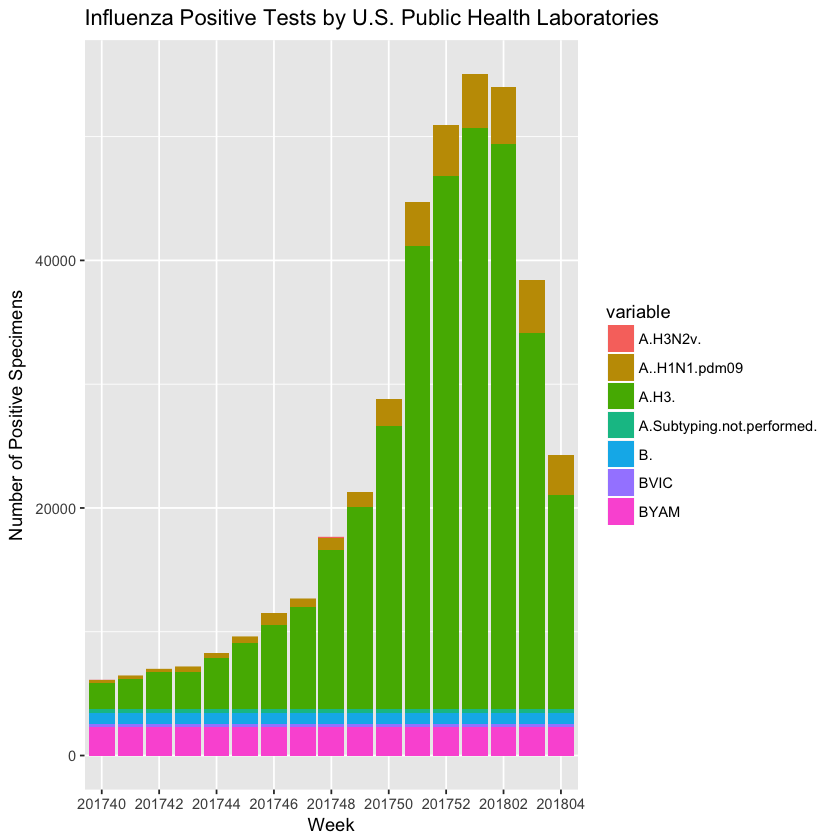

In [115]:
library("ggplot2")
library("ggmap")
library("sp")
library("maptools")
library("maps")
library("reshape")

d <- read.csv("Positive_Tested_chart.csv")[,1:4]
e <- read.csv("Positive_Tested_chart.csv")[,6:9]
f <- merge(d, e)
mdata <- melt(f, id=c("Week"))

p4 <- ggplot() +geom_bar(aes(y = value, x = factor(Week), fill = variable), data = mdata,
                           stat="identity") + ggtitle("Influenza Positive Tests by U.S. Public Health Laboratories") + labs(y="Number of Positive Specimens", x = "Week") +
scale_x_discrete(breaks=c("201740","201742","201744","201746","201748","201750","201752","201802","201804")) + geom_boxplot()
p4

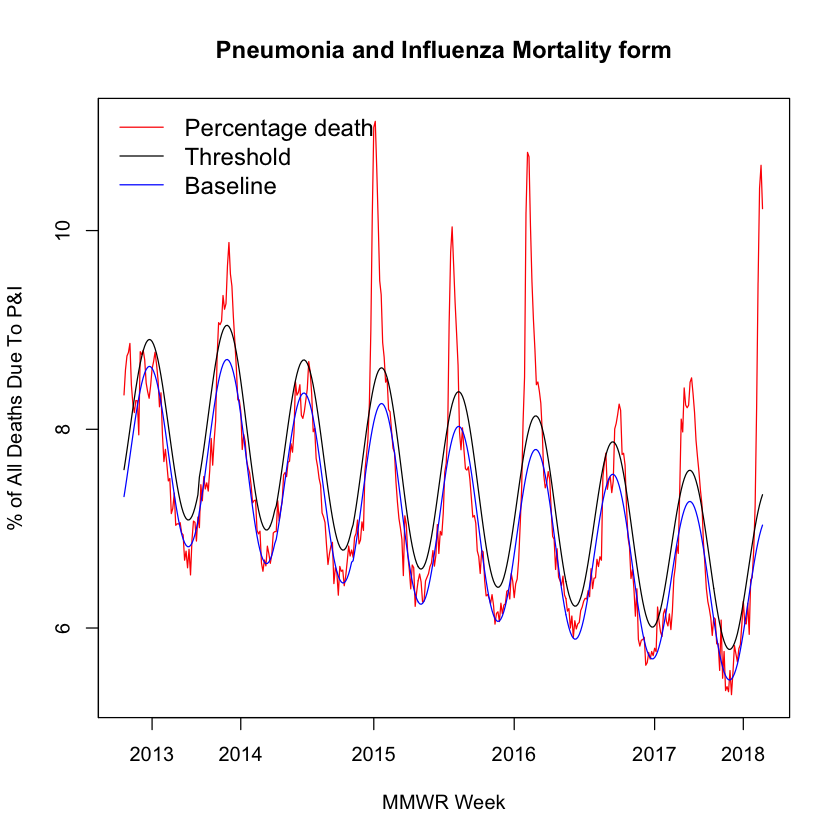

In [114]:
data <- read.csv("NCHSData04.csv")[2:435,]
week <- data$Week
deaths <- data$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza
threshold <- data$Threshold
expected <- data$Expected
xlength <- 1:length(week)
plot(xlength, deaths,type = "l", axes=FALSE, col = "red", xlab = "MMWR Week", ylab = "% of All Deaths Due To P&I", main = "Pneumonia and Influenza Mortality form")
lines(xlength, threshold, type = "l", col = "black")
lines(xlength, expected, type = "l", col = "blue")
axis(side=2, at = c(4, 6,8,10,12), labels=c("4", "6", "8", "10", "12"))
axis(side=1, at = c(20,80,170,265,360,420), labels=c("2013", "2014", "2015", "2016", "2017", "2018"))
box()
legend("topleft", 
  legend = c("Percentage death", "Threshold", "Baseline"), 
  col = c("red", "black", "blue"), 
  lwd = c(1,1,1),
  bty = "n", 
  cex = 1.2, 
  text.col = "black", 
  horiz = F )


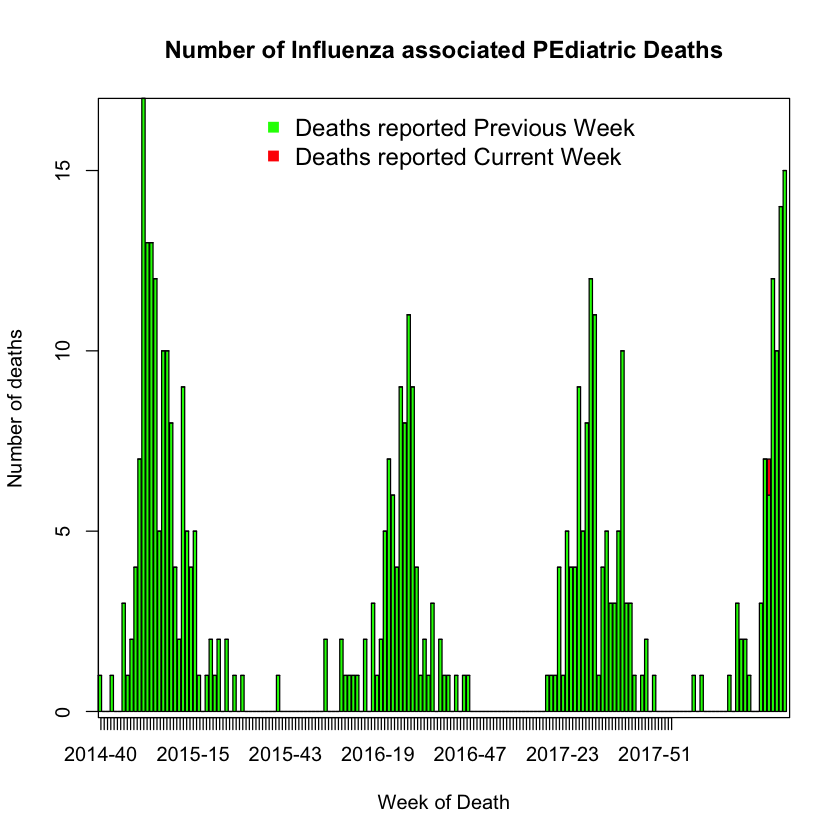

In [113]:
data <- read.csv("PedFluDeath.csv")
rows = data[,c(4,3)]
week = data[,2]
b <- week[seq(1, length(week), 6)]
barplot(t(rows),col=c("green","red"), xlim=c(8,202), xlab = "Week of Death", ylab = "Number of deaths",main="Number of Influenza associated PEdiatric Deaths")
axis(side=1, at=1:length(week), labels=week)
box()
legend("top", 
  legend = c("Deaths reported Previous Week", "Deaths reported Current Week"), 
  col = c("green", "red"), 
  pch = c(15, 15),
  bty = "n", 
  cex = 1.2, 
  text.col = "black", 
  horiz = F )

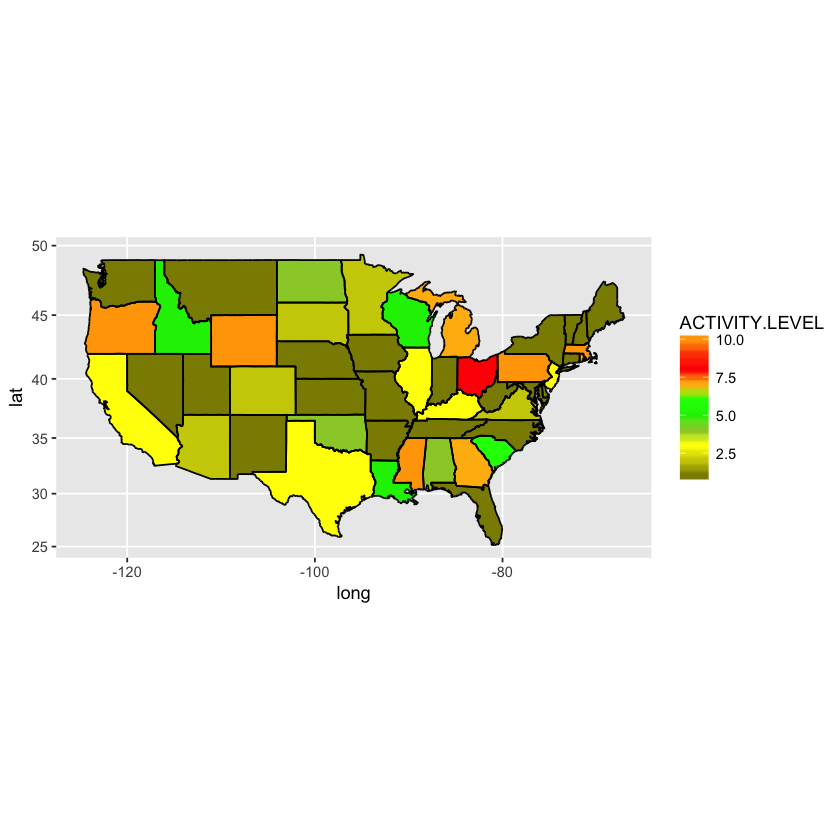

In [112]:
library("ggplot2")
library("ggmap")
library("maptools")
library("maps")
all_states<-map_data("state")
mapflu = read.csv("HeatMap.csv")
mapflu$region = (tolower(mapflu$STATENAME))
mapflu$ACTIVITY.LEVEL = as.integer(gsub("Level ", "", mapflu$ACTIVITY.LEVEL))
merged<- merge(all_states,mapflu, by="region", all.x=T)
#merged
ggplot(merged, aes(x=long, y=lat, group=group))+
geom_polygon(aes(fill=ACTIVITY.LEVEL))+
  geom_path()+ 
  scale_fill_gradientn(colours=c("yellow4", "yellow3","yellow", "yellowgreen", "green2",  "green", "darkgoldenrod1", "red", "orangered", "orange"),na.value="white")+
  coord_map()